Ten raport mozna również znaleźć w interaktywnej formie [tutaj](https://github.com/KsawerySmoczynski/modelowanie-procesow-finansowych/blob/master/notebooks/Własności-szeregu-zwrotów-logarytmicznych-spółki-Volkswagen-z-okresu-2018-2021.ipynb)

<a target="_blank" href="https://colab.research.google.com/github/KsawerySmoczynski/modelowanie-procesow-finansowych/blob/master/notebooks/Własności-szeregu-zwrotów-logarytmicznych-spółki-Volkswagen-z-okresu-2018-2021.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> <a href="https://github.com/KsawerySmoczynski/modelowanie-procesow-finansowych/blob/master/notebooks/Własności-szeregu-zwrotów-logarytmicznych-spółki-Volkswagen-z-okresu-2018-2021.ipynb"></a>

# Własności szeregu zwrotów logarytmicznych spółki Volkswagen z okresu 2018-2021

* Nazwa akcji: Volkswagen AG
* Skrót dla akcji: VOW.DE
* Branża: Motoryzacyjna - koncern motoryzacyjny

## Historia: 
Koncern powstał w 1937 roku na gruncie potrzeby produkcji taniego, rodzinnego samochodu którą Adolf Hitler przedłożył Ferdinandowi Porche, nadwornemu konstruktorowi
nazistowskich Niemiec. W 1938 roku do seryjnej produkcji został oddany pierwszy model VW populary "Garbus", a fabryka KdF-Wagen wykorzystywała robotników przymusowych i więźniów obozów koncentracyjnych.

W kolejnych dekadach Volkswagen rozwijał się, a w 1991 roku rozpoczęto ekspansję w nowe kierunki, takie jak otwarcie spółki w Chinach i Polsce. 
Powstała również Volkswagen Finanz GmbH, oferująca usługi finansowe. 
W 1998 roku koncern utworzył fundusz pomocy dla byłych robotników przymusowych.

W XXI wieku Volkswagen kontynuował ekspansję i inwestycje, jak np. Autostadt w 2000 roku oraz przejęcie przez MAN SE spółki Volkswagen Caminhōes e Ônibus w 2009 roku. 
Jednakże w 2015 roku koncern został wstrząśnięty aferą dotyczącą manipulacji wynikami pomiarów emisji w swoich pojazdach tzw. Diesel Gate, 
Mimo to, Volkswagen nadal odgrywa znaczącą rolę w przemyśle motoryzacyjnym, będąc także sponsorem klubu piłkarskiego VfL Wolfsburg.


## Wydarzenia mające wpływ na notowania spółki w danym okresie (2018-2021)
Na wykresie widzimy znaczącą wyprzedaż akcji koncernu skutującą obniżeniem wyceny jej akcji na skutek pandemii COVID19 która przypadała na marzec 2020.
Następnie w okresie kwiecień 2020 - kwiecień 2021 na skutek stymulusu fiskalnego i zapomóg pandemicznych, globalnie giełdy notowały wzrosty co również przełożyło się na wzrost cenę akcji VW.
Ostatecznie od kwietnia 2021 widzimy efekt podwyżki stóp procentowych i odpływ kapitału z giełd co przekłada się na kolejną korektę i obniżenie ceny akcji koncernu Volkswagen.

In [1]:
import pandas as pd
data = pd.read_csv("https://stooq.pl/q/d/l/?s=vow3.de&d1=20180101&d2=20211231&i=d", parse_dates=["Data"])
data.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
0,2018-01-02,130.912,131.163,126.737,130.049,1.533116e+06
1,2018-01-03,130.677,134.946,130.425,134.554,1.657879e+06
2,2018-01-04,135.386,137.222,134.428,136.908,1.818363e+06
3,2018-01-05,138.525,141.021,138.368,140.644,2.552202e+06
4,2018-01-08,141.978,142.041,140.597,141.146,1.350856e+06


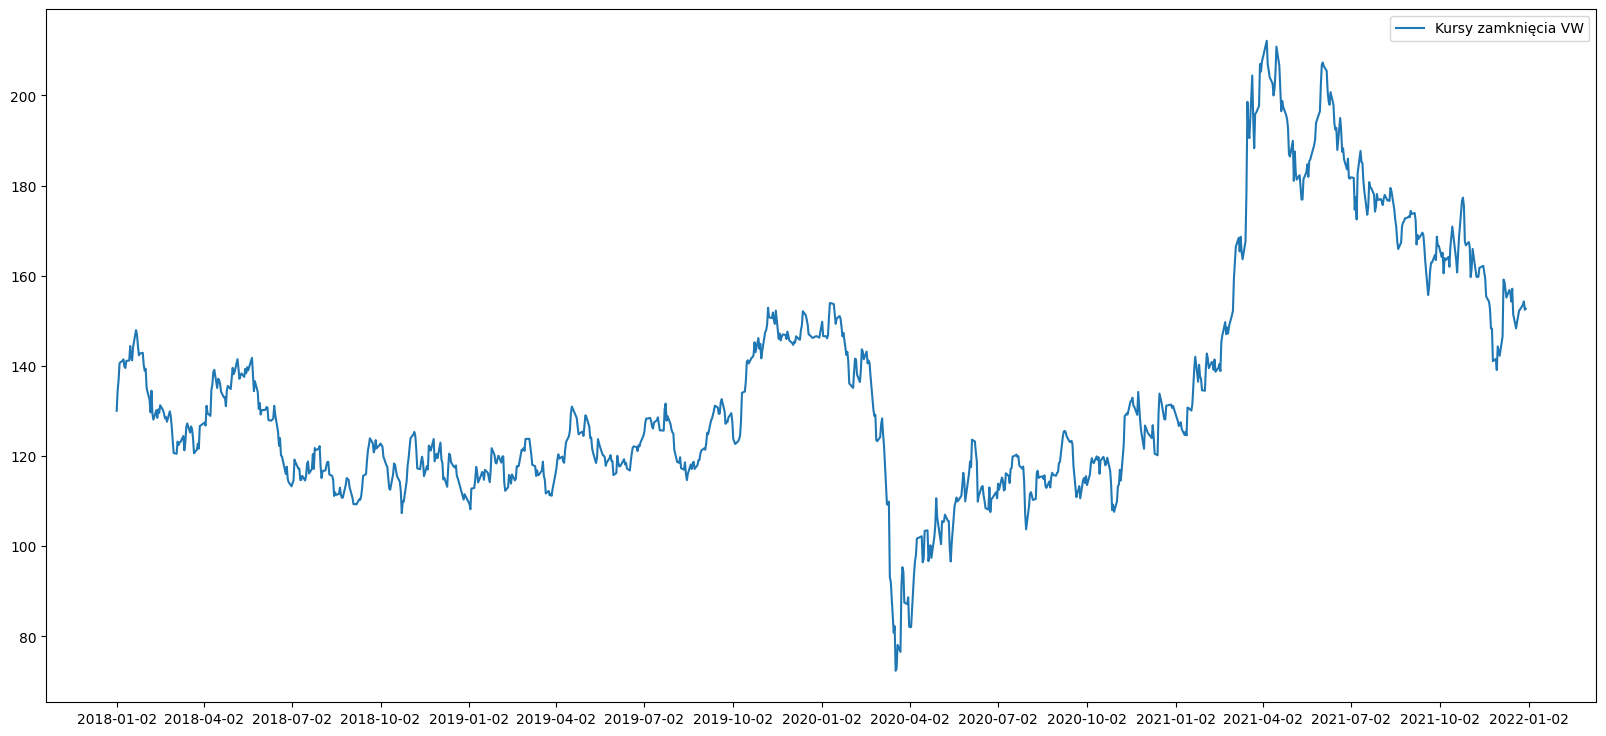

In [2]:
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta


min_date = datetime.fromtimestamp(data["Data"].min().timestamp())
max_date = datetime.fromtimestamp(data["Data"].max().timestamp())
d = relativedelta(max_date, min_date)
quarters = d.years * 4 + d.months // 3 + 1
x_ticks = [min_date + relativedelta(months=3*i) for i in range(quarters+1)]


fig, ax = plt.subplots(figsize=(20, 9))
ax.plot(data["Data"], data["Zamkniecie"], label="Kursy zamknięcia VW")
ax.legend()
ax.set_xticks(x_ticks)
plt.show()

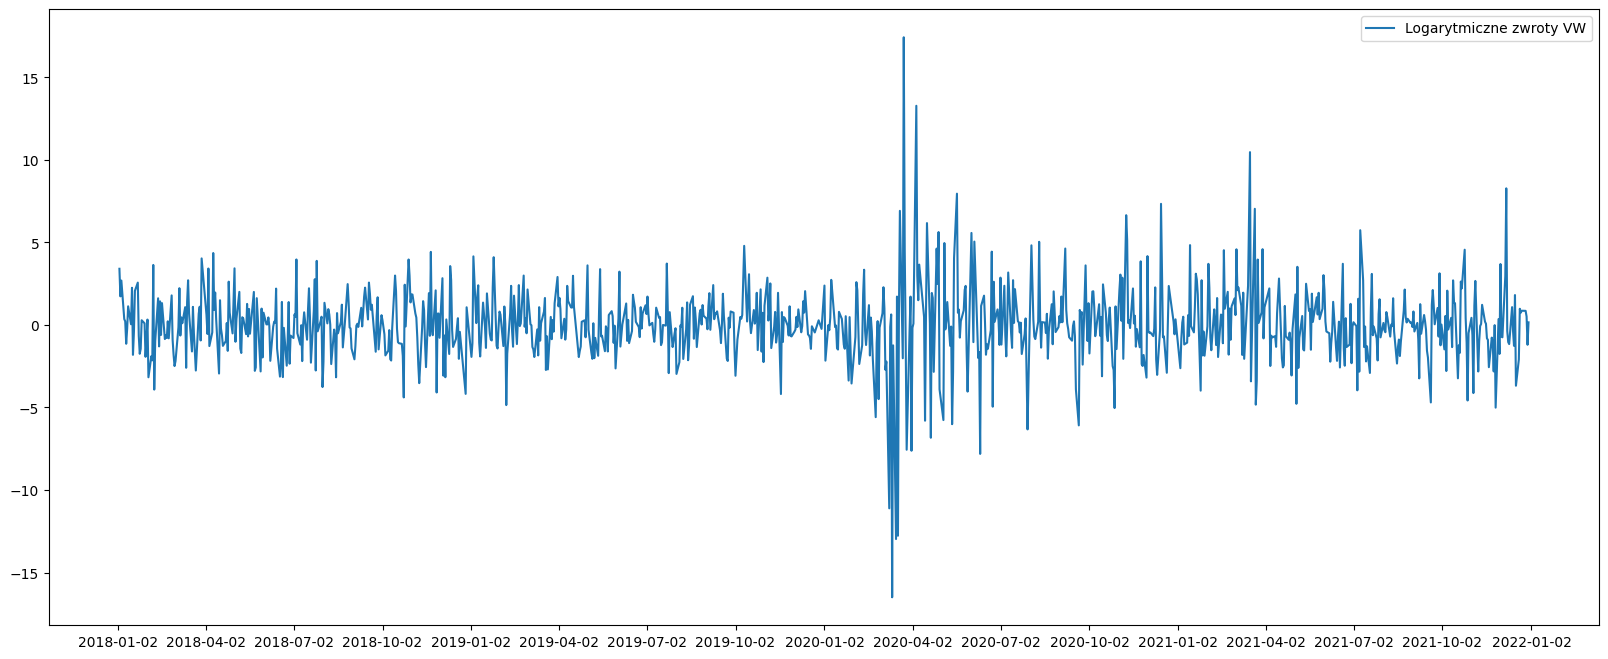

In [3]:
import numpy as np

def make_stationary(x:np.ndarray):
    # return 100 * (x[1:] - x[:-1])
    return 100 * (np.log(x[1:]) - np.log(x[:-1]))

log_returns = make_stationary(data["Zamkniecie"].values)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(data.loc[1:, "Data"], log_returns, label="Logarytmiczne zwroty VW")
ax.legend()
ax.set_xticks(x_ticks)
plt.show()

Zgodnie ze wcześniejszym opisem widzimy znaczący wzrost zmienności zwrotów w okresie przypadającym na wybuch pandemii COVID19.

## Statystyki opisowe

In [4]:
log_returns = pd.DataFrame(log_returns, columns=["Logartymiczne zwroty VW"])
log_returns.describe()

,Logartymiczne zwroty VW
count,1009.000000
mean,0.015916
std,2.300384
min,-16.501493
25%,-1.108679
50%,-0.012921
75%,1.055295
max,17.433991


Średnia logarytmicznych zwrotów w badanym okresie wynosi 0.015 co oznacza, że w rozważanym okresie średnio wzrost ceny spółki przewyższał spadki co odzwierciedla również wyższa cena instrumentu na koniec badanego okresu w porównaniu z jego początkiem.

### Współczynnik zmienności

In [5]:
log_returns.std() / log_returns.mean()

Logartymiczne zwroty VW    144.529029
dtype: float64

### Skośność i Kurtoza nadwyżkowa

In [6]:
log_returns.skew().values[0], (log_returns.kurtosis() - 3).values[0]

(-0.00945022835761155, 6.702335837462236)

Rozkład charakteryzuje się małą skośnością, masa prawdopodobieństwa rozkłada się w okolicach średniej, natomiast
ze względu na wysoką wartość kurtozy nadwyżkowej możemy wnioskować o leptokurtyczności rozkładu logarytmicznych zwrotów, co przekłada się na
większą ilość skrajnych zwrotów lub strat niż wynikało by to z rozkładu normalnego. Aby się o tym przekonać przeprowadzimy test Jarque-Bera'y

### Brakujące obserwacje

In [7]:
log_returns.isna().sum()

Logartymiczne zwroty VW    0
dtype: int64

### Q3 - Q1

In [8]:
log_returns.quantile(0.75) - log_returns.quantile(0.25)

Logartymiczne zwroty VW    2.163974
dtype: float64

## Test Jarque'a-Bera'y

In [9]:
from statsmodels.stats.stattools import jarque_bera

test_statistic, p_value, skewness, kurtosis = jarque_bera(log_returns)
test_statistic[0], p_value[0], skewness[0], kurtosis[0]

(3913.728096995842, 0.0, -0.009436173649672955, 12.648382937936523)

P-value dla statystyki testowej testu Jarque'a-Bera'y wynosi 0, co powoduje, że powinniśmy odrzucić hipotezę zerową o normalności rozkładu logarytmicznych zwrotów spółki VW.

## Analiza histogramu i wykresu kwantyl kwantyl

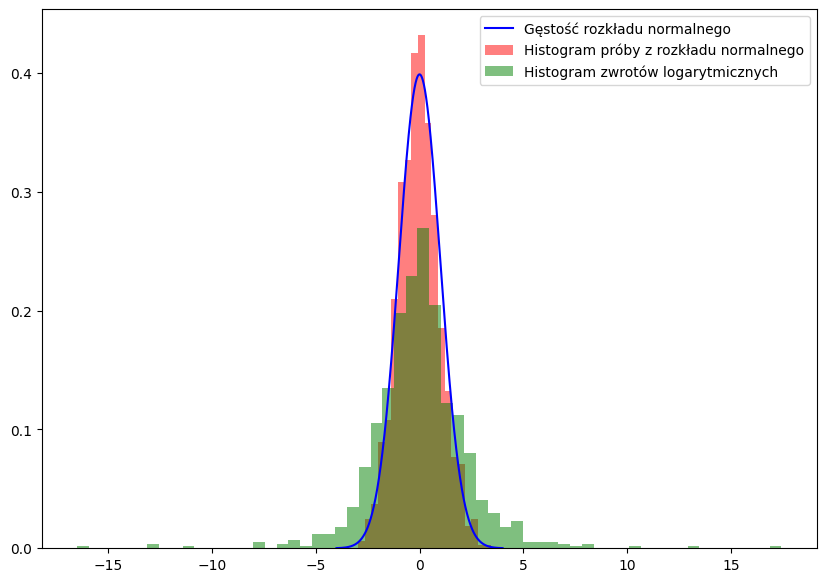

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

log_returns = log_returns["Logartymiczne zwroty VW"].values
N=len(log_returns)
x = stats.norm.rvs(size=N)
num_bins = 20
y = np.linspace(-4, 4, 1000)
bin_width = (x.max() - x.min()) / num_bins

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(y, stats.norm.pdf(y), color="b", label="Gęstość rozkładu normalnego")
ax.hist(x, density=True, bins=num_bins, facecolor='r', alpha=0.5, label="Histogram próby z rozkładu normalnego")
ax.hist(log_returns, density=True, bins=3*num_bins, facecolor='g', alpha=0.5, label="Histogram zwrotów logarytmicznych")
ax.legend()
plt.show()

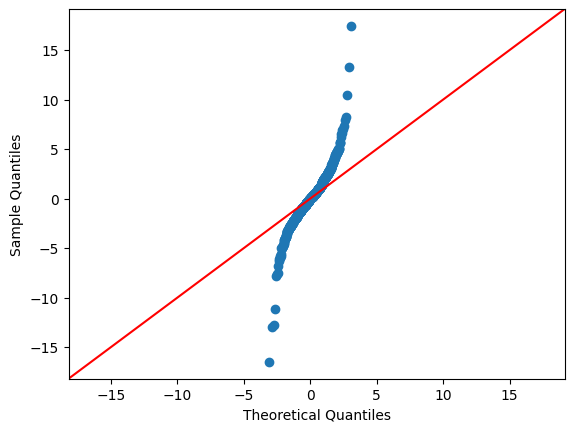

In [11]:
import statsmodels.api as sm 

sm.qqplot(log_returns, line ='45') 
plt.show() 

## Analiza korelacji i korelacji częściowej dla szeregu zwrotów logarytmicznych wraz z wynikami testu Boxa-Pierce’a i Ljunga-Boxa

In [12]:
squared_log_returns = pd.Series(log_returns**2, name="squared log returns")
log_returns = pd.Series(log_returns, name="log returns")


log_returns_autocorr = np.array([(i, log_returns.autocorr(lag=i)) for i in range(1,21)])
squared_log_returns_autocorr = np.array([(i, squared_log_returns.autocorr(lag=i)) for i in range(1,21)])

In [13]:
import seaborn as sns
import statsmodels

ljungbox_boxpierce = statsmodels.stats.diagnostic.acorr_ljungbox(log_returns, lags=list(range(1,21)), boxpierce=True, model_df=0, period=None, return_df=True, auto_lag=False)
confidence = 0.95

both_tests_agree = ljungbox_boxpierce[(ljungbox_boxpierce["lb_pvalue"] > 1-confidence) & (ljungbox_boxpierce["bp_pvalue"] > 1-confidence)]
set(ljungbox_boxpierce[(ljungbox_boxpierce["bp_pvalue"] > 1-confidence)].index) == set(ljungbox_boxpierce[(ljungbox_boxpierce["lb_pvalue"] > 1-confidence)].index)

True

In [14]:
both_tests_agree

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,2.169953,0.140731,2.163514,0.141321
2,2.525771,0.282837,2.517924,0.283949
3,2.839434,0.417049,2.830036,0.418579
4,5.045224,0.282689,5.022735,0.284973
5,5.166099,0.395948,5.142773,0.398706


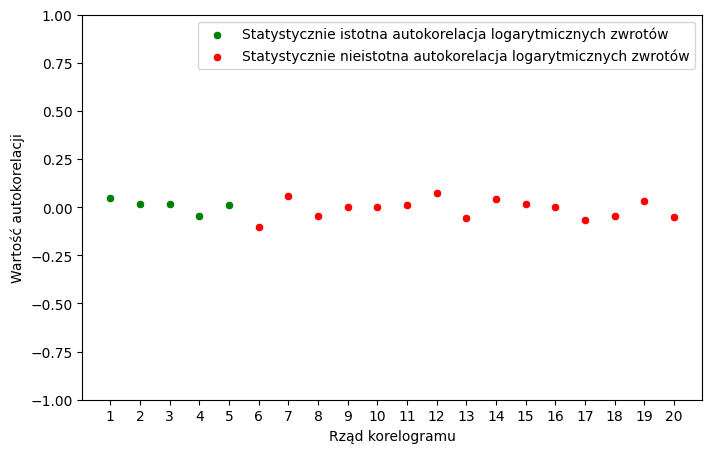

In [15]:
not_significant = np.array(sorted(list(set(ljungbox_boxpierce.index-1).difference(set(both_tests_agree.index-1)))))
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=log_returns_autocorr[both_tests_agree.index-1,0], y=log_returns_autocorr[both_tests_agree.index-1,1], label="Statystycznie istotna autokorelacja logarytmicznych zwrotów", c="g", ax=ax)
sns.scatterplot(x=log_returns_autocorr[not_significant,0], y=log_returns_autocorr[not_significant,1], label="Statystycznie nieistotna autokorelacja logarytmicznych zwrotów", c="r", ax=ax)
ax.set_xticks(log_returns_autocorr[:,0])
ax.set_ylabel("Wartość autokorelacji")
ax.set_xlabel("Rząd korelogramu")
ax.set_ylim(-1.0, 1.0)
plt.show()

Jak widać tylko dla pierwszych pięciu wartości korelogramu są one istotne statystycznie. 
Jednakże jak dobrze widzimy dla wszystkich wartości autokorelacja oscyluje wokół zera, nie przekraczając co do absolutnej wartości wartości 0.25, co mówi nam, o znikomej liniowej relacji pomiędzy szeregiem logarytmicznych zwrotów a nim samym przesuniętym o określoną liczbe dni.

## Analiza korelacji i korelacji częściowej dla szeregu kwadratów zwrotów logarytmicznych wraz z wynikami testu Boxa-Pierce’a i Ljunga-Boxa

In [16]:
ljungbox_boxpierce = statsmodels.stats.diagnostic.acorr_ljungbox(squared_log_returns, lags=list(range(1,21)), boxpierce=True, model_df=0, period=None, return_df=True, auto_lag=False)
confidence = 0.95

both_tests_agree = ljungbox_boxpierce[(ljungbox_boxpierce["lb_pvalue"] > 1-confidence) & (ljungbox_boxpierce["bp_pvalue"] > 1-confidence)]
set(ljungbox_boxpierce[(ljungbox_boxpierce["bp_pvalue"] > 1-confidence)].index) == set(ljungbox_boxpierce[(ljungbox_boxpierce["lb_pvalue"] > 1-confidence)].index)

True

In [17]:
both_tests_agree

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,0.866426,0.351947,0.863855,0.352662


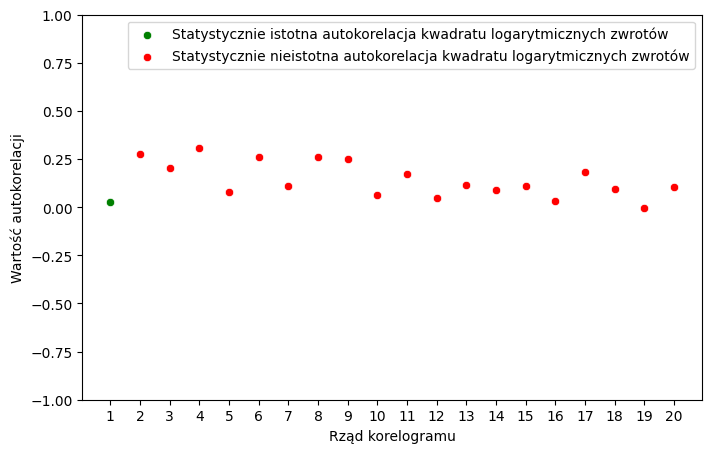

In [18]:
not_significant = np.array(sorted(list(set(ljungbox_boxpierce.index-1).difference(set(both_tests_agree.index-1)))))
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=squared_log_returns_autocorr[both_tests_agree.index-1,0], y=squared_log_returns_autocorr[both_tests_agree.index-1,1], label="Statystycznie istotna autokorelacja kwadratu logarytmicznych zwrotów", c="g", ax=ax)
sns.scatterplot(x=squared_log_returns_autocorr[not_significant,0], y=squared_log_returns_autocorr[not_significant,1], label="Statystycznie nieistotna autokorelacja kwadratu logarytmicznych zwrotów", c="r", ax=ax)
ax.set_xticks(squared_log_returns_autocorr[:,0])
ax.set_ylabel("Wartość autokorelacji")
ax.set_xlabel("Rząd korelogramu")
ax.set_ylim(-1.0, 1.0)
plt.show()

W przypadku kwadratów zwrotów logarytmicznych można mówić o jeszcze słabszej liniowej zależności między szeregiem kwadratów zwrotów, a nim samym przesuniętym o n-dni. Statystycznie istotna jest tylko wartość korelacji dla szeregu przesuniętego o jeden dzień. Dla tego przesunięcia wartość korelacji jest bliska zeru. 

# Podsumowanie

Szereg zwrotów logarytmicznych z akcji spółki Volkswagen w okresie 2018-2021 charakteryzuje się większą zmiennością niż wynikałoby to z rozkładu normalnego zwrotów.
Jednocześnie średnia zwrotów osiąga wartość zbliżoną do zera przy dużym odchyleniu standardowym.